# STOCK PRICE PREDICITONS

In [68]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [7]:
display(os.getcwd())

'C:\\Users\\mgowt\\Career\\PROJECTS\\Stock Price Prediction'

# PRICES

In [8]:
df = pd.read_csv('PRJ Stock Price Prediction\prices.csv',header = 0)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [9]:
df.shape

(851264, 7)

In [12]:
len(df['symbol'].unique())

501

In [14]:
df.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [17]:
df['symbol'].value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [19]:
print('No of companies',len(df['symbol'].unique()))
df['symbol'].unique()

No of companies 501


array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [21]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [22]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [25]:
df['date'].unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [27]:
len(df['date'].unique())

3524

# SECURITIES

In [33]:
comp_info = pd.read_csv('PRJ Stock Price Prediction\securities.csv')
comp_info.head(10)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",03-05-2016,1144215
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",05-05-1997,796343
7,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",09-07-2015,1158449
8,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",NaN,874761
9,AET,Aetna Inc,reports,Health Care,Managed Health Care,"Hartford, Connecticut",30-06-1976,1122304


In [31]:
comp_info.shape

(505, 8)

In [32]:
comp_info.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [34]:
len(comp_info['Ticker symbol'].unique())

505

In [37]:
print('Details of the prices avaliable for the companies',len(df['symbol'].unique()))
print('Details of the info avaliable for the companies',len(comp_info['Ticker symbol'].unique()))

Details of the prices avaliable for the companies 501
Details of the info avaliable for the companies 505


In [38]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [39]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [40]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [55]:
comp_info.loc[comp_info['Security'].str.startswith('Goldman'),:]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
212,GS,Goldman Sachs Group,reports,Financials,Investment Banking & Brokerage,"New York, New York",NaN,886982


In [61]:
comp_info.loc[comp_info['Security'].str.startswith('Microsoft'),:]


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
306,MSFT,Microsoft Corp.,reports,Information Technology,Systems Software,"Redmond, Washington",01-06-1994,789019


### Pick Needed 5 companies

In [64]:
comp_need = comp_info.loc[(comp_info['Security'] == 'Yahoo Inc.') | (comp_info['Security'] == 'Adobe Systems Inc') | (comp_info['Security'] == 'Goldman Sachs Group') | (comp_info['Security'] == 'Xerox Corp.') | (comp_info['Security'] == 'Xerox Corp.') | (comp_info['Security'] == 'Microsoft Corp.'),:]['Ticker symbol']
comp_need

6      ADBE
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object

In [65]:
for i in comp_need:
    print(i)

ADBE
GS
MSFT
XRX
YHOO


In [101]:
def plotter(code):
    global closing_stock , opening_stock
    
    #Opening Price Plot
    
    plt.subplot(2,1,1)
    company = df[df['symbol'] == code]
    company = company['open'].values.astype('float32')
    company = company.reshape(-1,1)
    opening_stock = company
    
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + '  Open stock prices')
    plt.title('Price X Time')
    plt.plot(company,'g')
    plt.show()
    
    #Closing Price Plot
    plt.subplot(2,1,2)
    company_close = df[df['symbol'] == code]
    company_close = company_close['close'].values.astype('float32')
    company_close = company_close.reshape(-1,1)
    closing_stock = company_close
    
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + '  Close Stock Prices')
    plt.title('Price X Time for  '+ i)
    plt.plot(company_close,'b')
    plt.show()
    

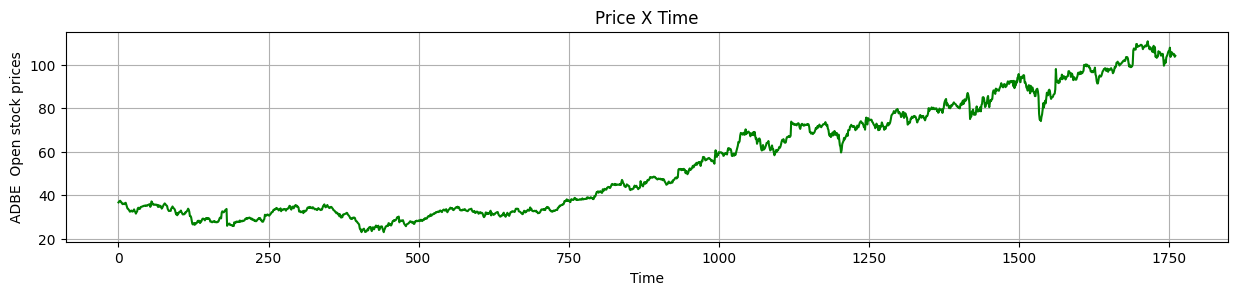

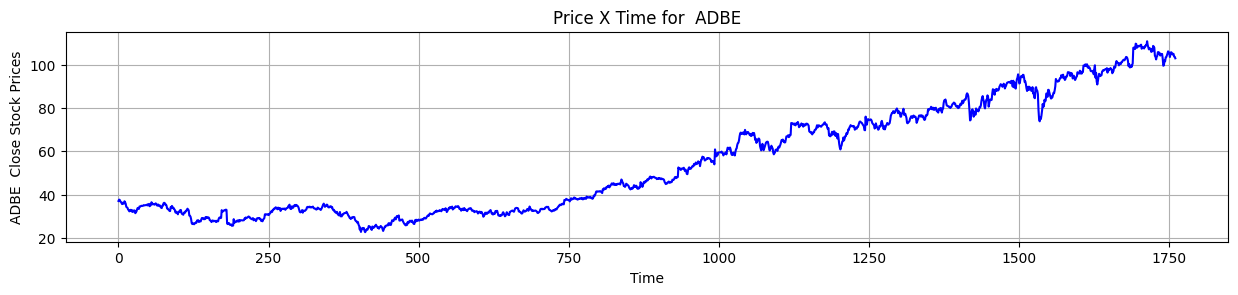

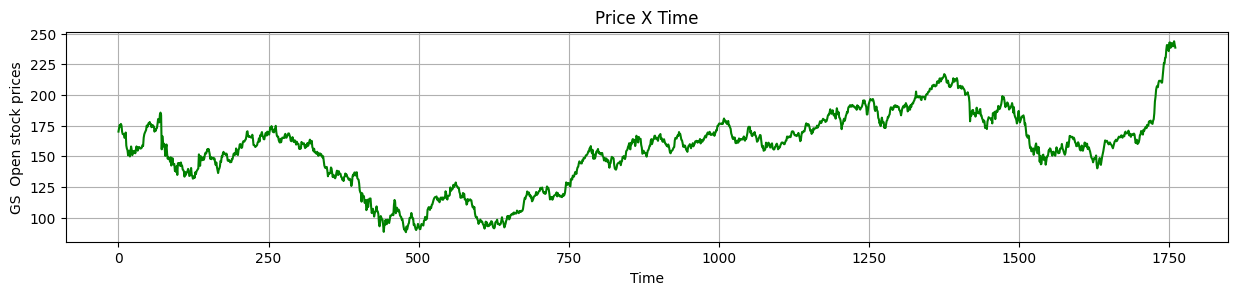

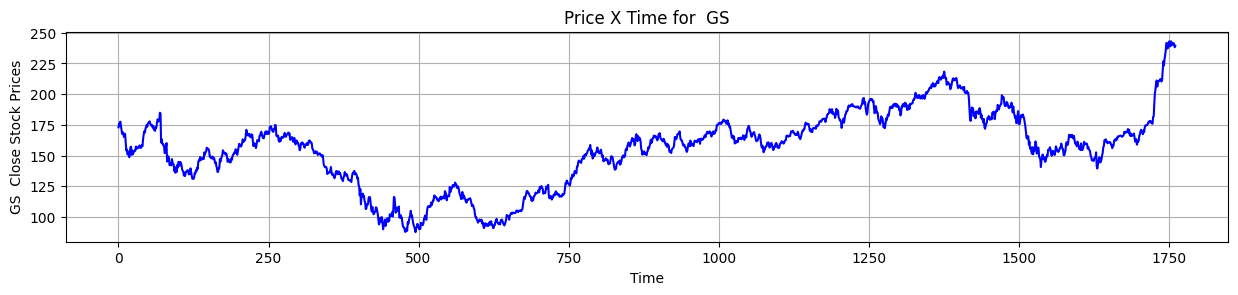

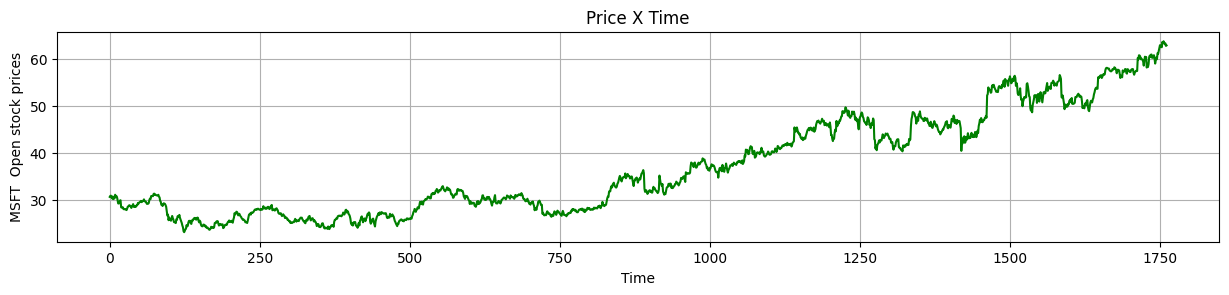

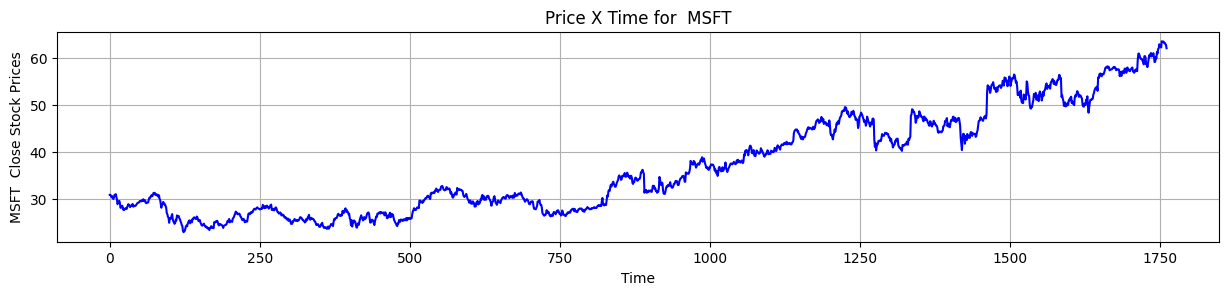

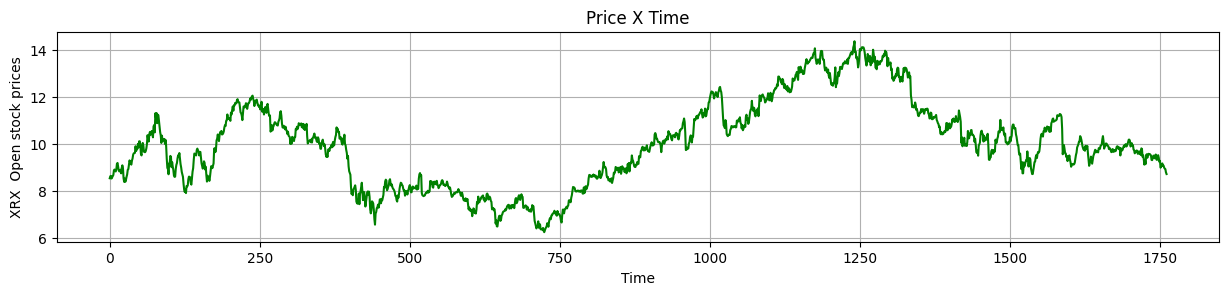

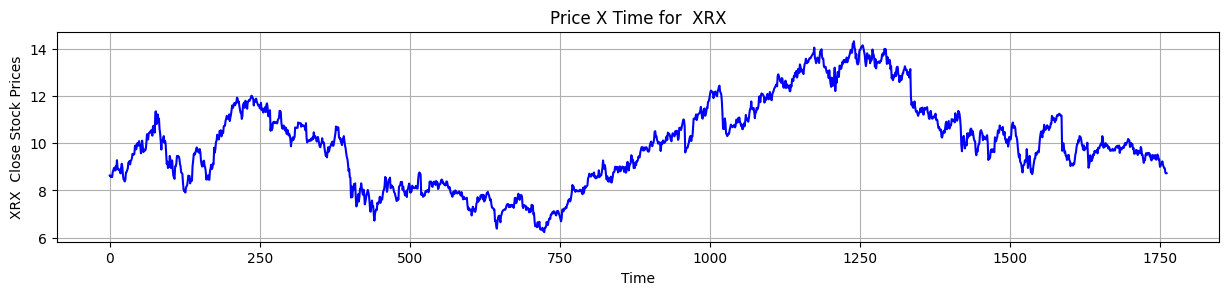

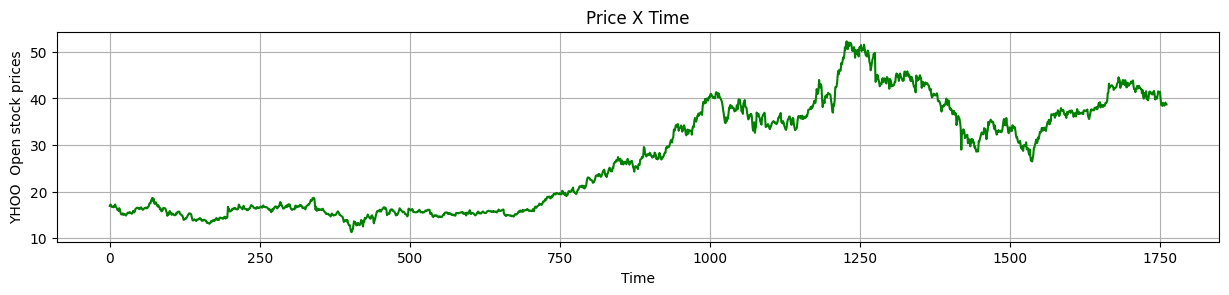

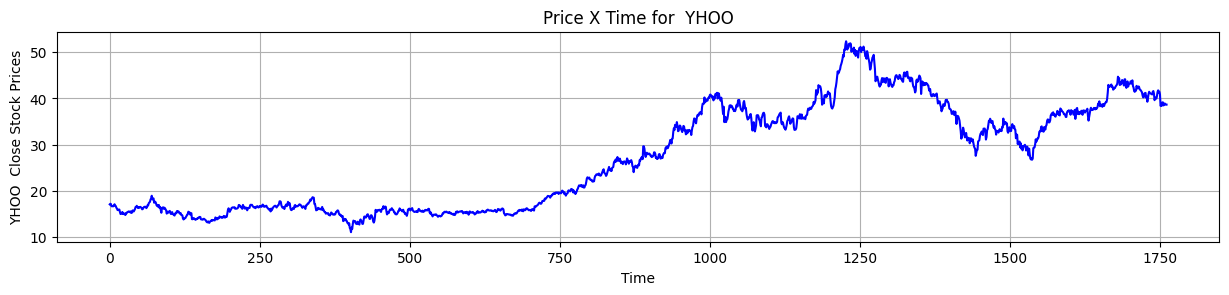

In [102]:
for i in comp_need:
    plotter(i)

In [108]:
#Yahoo closing data
stocks = np.array(df[df['symbol'].isin(['YHOO'])].close)
print('max ',stocks.max())
print('min ',stocks.max())
stocks

max  52.369999
min  52.369999


array([17.1     , 17.23    , 17.17    , ..., 38.73    , 38.639999,
       38.669998])

In [112]:
stocks.reshape(len(stocks),1)
stocks

array([17.1     , 17.23    , 17.17    , ..., 38.73    , 38.639999,
       38.669998])

In [117]:
stocks = stocks.reshape(-1,1)
stocks.shape

(1762, 1)

### SCALING

In [118]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler(feature_range=(0,1))
stocks = mms.fit_transform(stocks)
stocks

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [119]:
train_len = int(len(stocks) * 0.8)
train_len

1409

In [120]:
test_len = len(stocks) - train_len
test_len

353

In [121]:
train = stocks[0:train_len]
print(train.shape)
train

(1409, 1)


array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.63372095],
       [0.61458332],
       [0.61967051]])

In [124]:
test = stocks[train_len:]
print(test.shape)

(353, 1)


In [125]:
def process_data(data , n_features):
    dataX , dataY = [],[]
    for i in range(len(data) - n_features):
        a = data[i : (i + n_features),0]
        dataX.append(a)
        dataY.append(data[i + n_features,0 ])
    return np.array(dataX) , np.array(dataY)

In [126]:
n_features = 5
trainX , trainY = process_data(train , n_features)
print(trainX.shape , trainY.shape)

(1404, 5) (1404,)


In [128]:
testX , testY = process_data(test , n_features)
print(testX.shape , testY.shape)

(348, 5) (348,)


In [157]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1757, 5) (1757,)


In [131]:
trainX[:10]

array([[0.14559109, 0.14874031, 0.14728683, 0.13590119, 0.13590119],
       [0.14874031, 0.14728683, 0.13590119, 0.13590119, 0.13687016],
       [0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667],
       [0.13590119, 0.13590119, 0.13687016, 0.13541667, 0.14074613],
       [0.13590119, 0.13687016, 0.13541667, 0.14074613, 0.14607561],
       [0.13687016, 0.13541667, 0.14074613, 0.14607561, 0.13880814],
       [0.13541667, 0.14074613, 0.14607561, 0.13880814, 0.13711241],
       [0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ],
       [0.14607561, 0.13880814, 0.13711241, 0.1281492 , 0.12378879],
       [0.13880814, 0.13711241, 0.1281492 , 0.12378879, 0.11603682]])

In [132]:
print(trainX.shape)
trainX = trainX.reshape(trainX.shape[0] , 1 , trainX.shape[1])
trainX.shape

(1404, 5)


(1404, 1, 5)

In [133]:
testX = testX.reshape(testX.shape[0] , 1 , testX.shape[1])
testX.shape

(348, 1, 5)

In [159]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1757, 1, 5)

# BUILDING LSTM MODEL

In [137]:
from tensorflow.keras.layers import LSTM , GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout , Activation
from tensorflow.keras.optimizers import Adam , SGD , RMSprop
from sklearn.metrics import mean_squared_error
import math

In [142]:
filepath = 'PRJ Stock Price Prediction\stock_weights1.hdf5'
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor = 'val_loss' , factor = 0.1 , epsilon = 0.0001 , patience = 1 , verbose = 1)
checkpoint = ModelCheckpoint(filepath , monitor = 'val_loss' , varbose = 1 , save_best_only = True , mode = 'max')

In [138]:
model = Sequential()

In [139]:
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 1, 256)            201984    
                                                                 
 dropout_2 (Dropout)         (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 743,809
Trainable params: 743,809
Non-tr

In [140]:
model.compile( loss = 'mean_squared_error' , optimizer = Adam(learning_rate=0.0005) , metrics = ['mean_squared_error'])

In [143]:
history = model.fit(trainX , trainY , epochs = 100 , batch_size = 128 , callbacks = [checkpoint , lr_reduce] , validation_data = (testX , testY))

Epoch 1/100
11/11 [==============================] - 7s 185ms/step - loss: 0.1177 - mean_squared_error: 0.1177 - val_loss: 0.0711 - val_mean_squared_error: 0.0711 - lr: 5.0000e-04
Epoch 2/100
11/11 [==============================] - 1s 94ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0134 - val_mean_squared_error: 0.0134 - lr: 5.0000e-04
Epoch 3/100
11/11 [==============================] - 1s 91ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - lr: 5.0000e-04
Epoch 4/100
11/11 [==============================] - 1s 90ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 5.5655e-04 - val_mean_squared_error: 5.5655e-04 - lr: 5.0000e-04
Epoch 5/100
11/11 [==============================] - ETA: 0s - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 5: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
11/11 [==============================] - 1s 86ms/step - loss: 0.0032 - mean_squared_error: 0.

Epoch 26/100
11/11 [==============================] - ETA: 0s - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 26: ReduceLROnPlateau reducing learning rate to 5.000000590745473e-26.
11/11 [==============================] - 0s 36ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 5.0000e-25
Epoch 27/100
11/11 [==============================] - ETA: 0s - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 27: ReduceLROnPlateau reducing learning rate to 5.000000714004989e-27.
11/11 [==============================] - 0s 38ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 5.0000e-26
Epoch 28/100
 9/11 [=======================>......] - ETA: 0s - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 28: ReduceLROnPlateau reducing learning rate to 5.00000071400499e-28.
11/11 [==============================] - 0s 36ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - va

Epoch 51/100
11/11 [==============================] - 0s 30ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 52/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 53/100
11/11 [==============================] - 0s 31ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 54/100
11/11 [==============================] - 1s 49ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 55/100
11/11 [==============================] - 0s 36ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 56/100
11/11 [==============================] - 0s 34m

Epoch 95/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 96/100
11/11 [==============================] - 0s 38ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 97/100
11/11 [==============================] - 1s 50ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 98/100
11/11 [==============================] - 1s 57ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 99/100
11/11 [==============================] - 0s 37ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 7.2597e-04 - val_mean_squared_error: 7.2597e-04 - lr: 0.0000e+00
Epoch 100/100
11/11 [==============================] - 0s 48

In [145]:
test_pred = model.predict(testX)
test_pred[:10]

11/11 [==============================] - 0s 3ms/step


array([[0.5907027 ],
       [0.5824235 ],
       [0.5798101 ],
       [0.5854856 ],
       [0.5777251 ],
       [0.5632524 ],
       [0.54174167],
       [0.5251695 ],
       [0.51108426],
       [0.5059296 ]], dtype=float32)

In [146]:
test_pred = mms.inverse_transform(test_pred)
test_pred[:10]

array([[35.474205],
       [35.132442],
       [35.02456 ],
       [35.258842],
       [34.93849 ],
       [34.341057],
       [33.453094],
       [32.768997],
       [32.187557],
       [31.974771]], dtype=float32)

In [147]:
testY[:10]

array([0.60586237, 0.59593022, 0.58381782, 0.55741276, 0.52906978,
       0.48982557, 0.50024226, 0.51913761, 0.54748061, 0.53415697])

In [148]:
testY = testY.reshape(testY.shape[0] , 1)
testY[:10]

array([[0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697]])

In [149]:
testY = mms.inverse_transform(testY)
testY[:10]

array([[36.099998],
       [35.689999],
       [35.189999],
       [34.099998],
       [32.93    ],
       [31.309999],
       [31.74    ],
       [32.52    ],
       [33.689999],
       [33.139999]])

In [150]:
from sklearn.metrics import r2_score
score = r2_score(testY , test_pred)
score

0.936488929239188

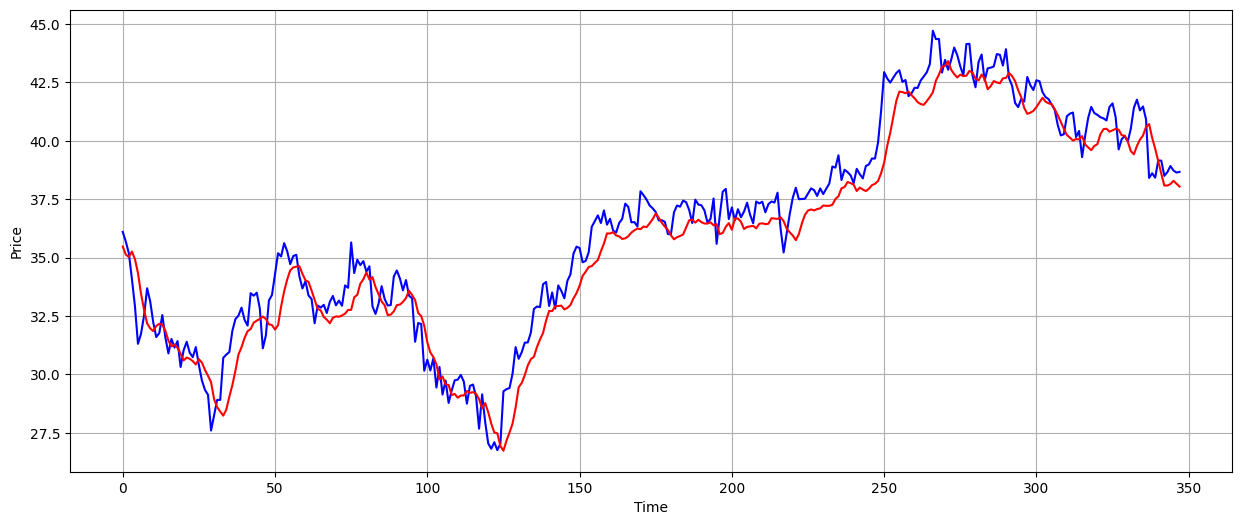

In [152]:
plt.plot(testY , 'b')
plt.plot(test_pred , 'r')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [154]:
train_pred = model.predict(trainX)
train_pred = mms.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = mms.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))

44/44 [==============================] - 0s 2ms/step
Display Accuracy Training Data


0.9923173355297243

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


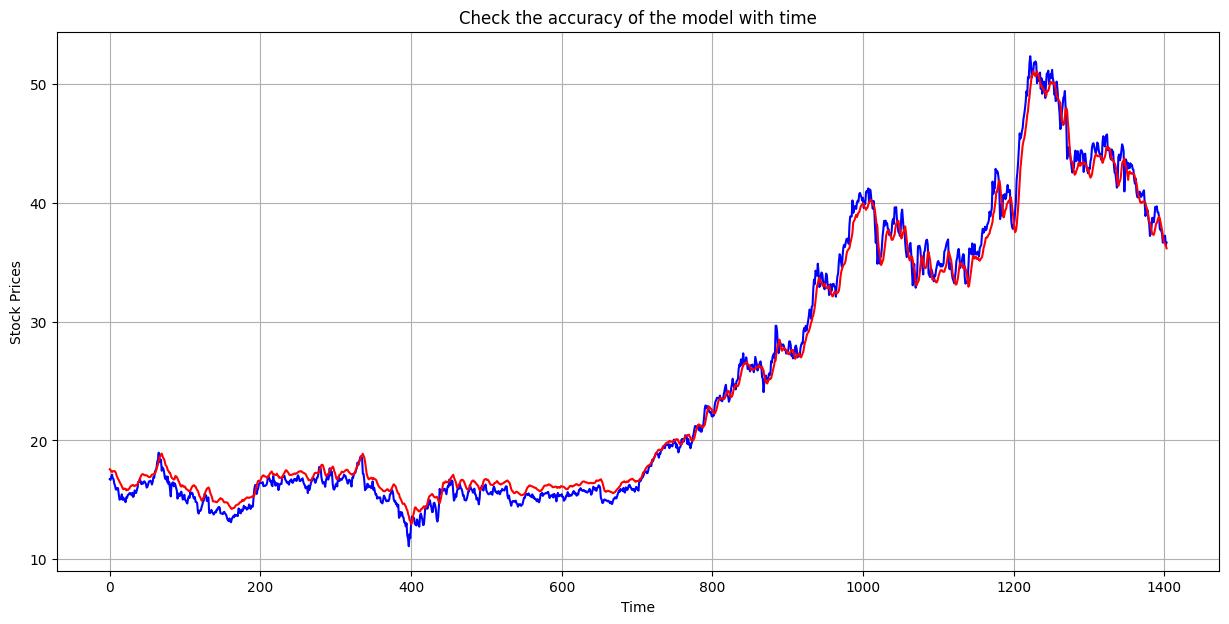

In [155]:
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [161]:
stocks_pred = model.predict(stocksX)
stocks_pred = mms.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = mms.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))

55/55 [==============================] - 0s 2ms/step
Display Accuracy Training Data


0.9918346289678808

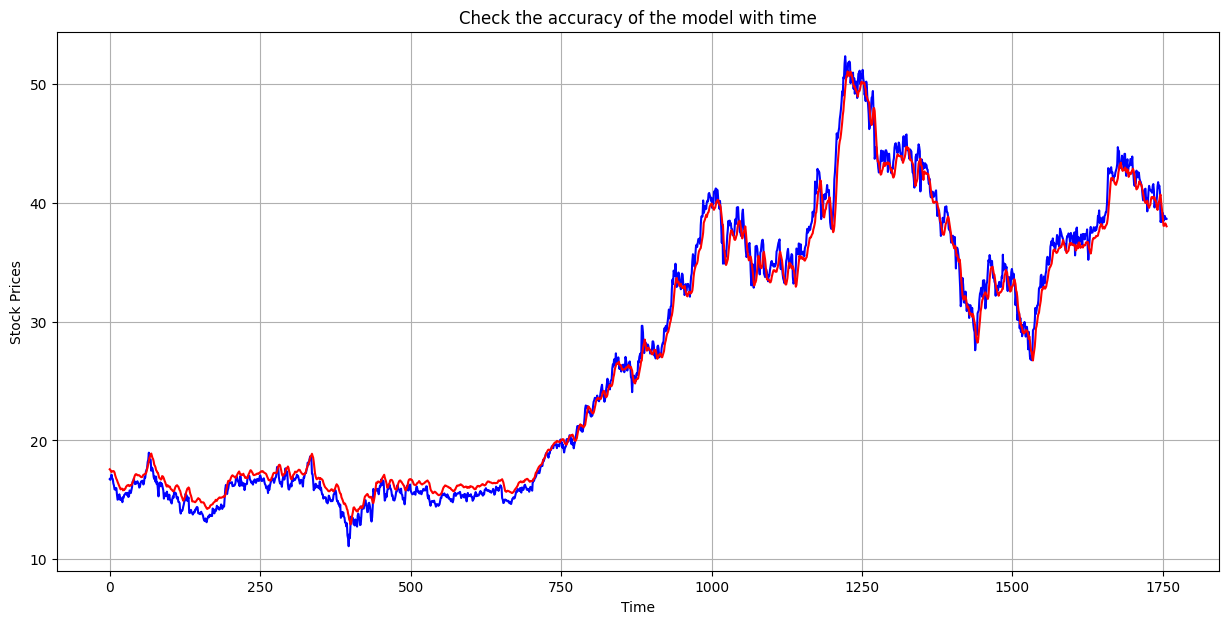

In [162]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [163]:
final_score = r2_score(stocksY , stocks_pred)
final_score   

0.9918346289678808

# 99% ACCURACY SCORE